In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
import seaborn as sns

In [4]:
df = pd.read_csv('weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
df.shape

(145460, 23)

In [6]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.describe().transpose()

count         mean        std    min     25%     50%     75%  \
MinTemp        56420.0    13.464770   6.416689   -6.7     8.6    13.2    18.4   
MaxTemp        56420.0    24.219206   6.970676    4.1    18.7    23.9    29.7   
Rainfall       56420.0     2.130397   7.014822    0.0     0.0     0.0     0.6   
Evaporation    56420.0     5.503135   3.696282    0.0     2.8     5.0     7.4   
Sunshine       56420.0     7.735626   3.758153    0.0     5.0     8.6    10.7   
WindGustSpeed  56420.0    40.877366  13.335232    9.0    31.0    39.0    48.0   
WindSpeed9am   56420.0    15.667228   8.317005    2.0     9.0    15.0    20.0   
WindSpeed3pm   56420.0    19.786778   8.510180    2.0    13.0    19.0    26.0   
Humidity9am    56420.0    65.874123  18.513289    0.0    55.0    67.0    79.0   
Humidity3pm    56420.0    49.601985  20.197040    0.0    35.0    50.0    63.0   
Pressure9am    56420.0  1017.239505   6.909357  980.5  1012.7  1017.2  1021.8   
Pressure3pm    56420.0  1014.795580   6.870892  977.1  1010.1  1014.7  1019.4   
Cloud9am       56420.0     4.241705   2.797162    0.0     1.0     5.0     7.0   
Cloud3pm       56420.0     4.326515   2.647251    0.0     2.0     5.0     7.0   
Temp9am        56420.0    18.204961   6.567991   -0.7    13.1    17.8    23.3   
Temp3pm        56420.0    22.710333   6.836543    3.7    17.4    22.4    27.9   

                  max  
MinTemp          31.4  
MaxTemp          48.1  
Rainfall        206.2  
Evaporation      81.2  
Sunshine         14.5  
WindGustSpeed   124.0  
WindSpeed9am     67.0  
WindSpeed3pm     76.0  
Humidity9am     100.0  
Humidity3pm     100.0  
Pressure9am    1040.4  
Pressure3pm    1038.9  
Cloud9am          8.0  
Cloud3pm          9.0  
Temp9am          39.4  
Temp3pm          46.1

Predicting where the wind will go

<AxesSubplot:>

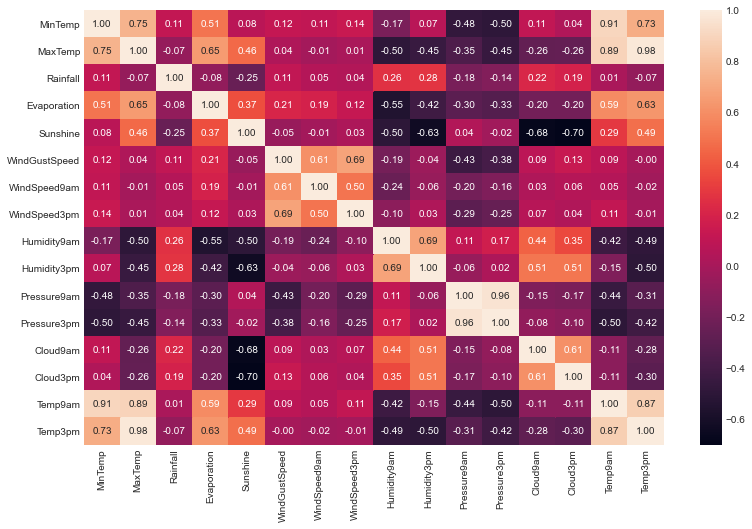

In [10]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f') #Correlation matrix, 2 decimal places

In [11]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [12]:
print(f" Tomorrow Rain : \n{df['RainTomorrow'].value_counts()}")
print(f" Today Rain :\n{df['RainToday'].value_counts()}")

 Tomorrow Rain : 
0    43993
1    12427
Name: RainTomorrow, dtype: int64
 Today Rain :
No     43958
Yes    12462
Name: RainToday, dtype: int64


Text(0, 0.5, 'Rainfall')

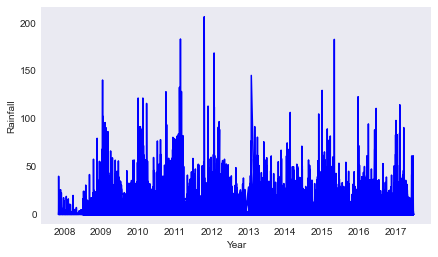

In [13]:
plt.figure(figsize = (7,4))
plt.plot(df['Date'], df['Rainfall'], color='blue')
plt.xlabel('Year')
plt.ylabel('Rainfall')

Plotting bar chart to the 2 things :
- data = df, RainToday

In [14]:
raintoday = df['RainToday'].value_counts()
raintomorrow = df['RainTomorrow'].value_counts()

/Users/dimas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dimas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

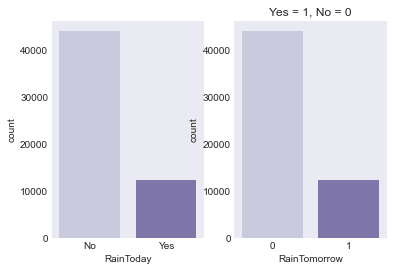

In [15]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots(1,2)
sns.countplot(df['RainToday'], ax=ax[0], palette='Purples')
sns.countplot(df['RainTomorrow'], ax=ax[1], palette='Purples')
plt.title('Yes = 1, No = 0')

plt.show()

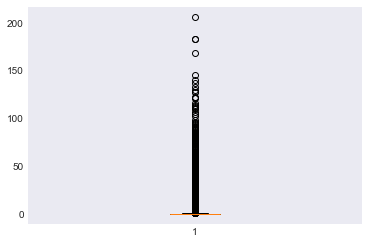

In [16]:
plt.boxplot(df['Rainfall'])
plt.show()

# Data untuk modelling :

# Menghapus outlier untuk data prediksi hujan :

In [17]:
df_rain = df[['Rainfall','Evaporation', 'Sunshine', 'RainTomorrow']]
df_rain = df_rain[df_rain['Rainfall']< 50]

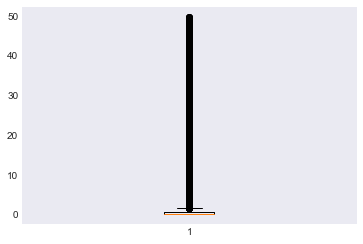

In [18]:
plt.boxplot(df_rain['Rainfall'])
plt.show()

In [19]:
df_rain['Rainfall'].value_counts()

0.0     36709
0.2      3009
0.4      1593
0.6      1087
0.8       834
        ...  
1.7         1
4.5         1
47.0        1
11.7        1
0.5         1
Name: Rainfall, Length: 271, dtype: int64

# Model :

In [21]:
df_rain

Rainfall  Evaporation  Sunshine  RainTomorrow
6049         0.0         12.0      12.3             0
6050         0.0         14.8      13.0             0
6052         0.0         10.8      10.6             0
6053         0.0         11.4      12.2             0
6054         0.0         11.2       8.4             0
...          ...          ...       ...           ...
142298       0.0          6.0      11.0             0
142299       0.0          7.6       8.6             0
142300       0.0          5.6      11.0             0
142301       0.0          6.2      10.6             0
142302       0.0          5.6      10.7             0

[56198 rows x 4 columns]

In [22]:
df_rain.isnull().sum()

Rainfall        0
Evaporation     0
Sunshine        0
RainTomorrow    0
dtype: int64

In [23]:
df_rain.dtypes

Rainfall        float64
Evaporation     float64
Sunshine        float64
RainTomorrow      int64
dtype: object

In [24]:
X = df_rain.iloc[:, [0,1]].values

In [25]:
y = df_rain.iloc[:, 3].values

<AxesSubplot:>

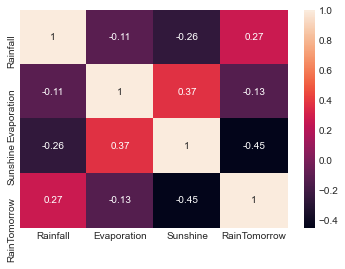

In [26]:
sns.heatmap(df_rain.corr(), annot=True)

# Split Data :

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69, stratify=y)

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=69, stratify=y_train)

In [30]:
X_train.shape

(39338, 2)

In [31]:
X_val.shape

(11240, 2)

In [32]:
X_test.shape

(5620, 2)

# Standardizing Data with Standard Scaler :

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)

In [34]:
X_val_trf = scaler.fit_transform(X_val)

# Logistic Regression :

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()
model_lr = LogisticRegression(solver = 'lbfgs', random_state = 0)
model_lr.fit(X_train_trf, y_train)

LogisticRegression(random_state=0)

In [37]:
%time y_val_predict = model_lr.predict(X_val_trf)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_predict))

CPU times: user 674 µs, sys: 236 µs, total: 910 µs
Wall time: 721 µs
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      8788
           1       0.58      0.11      0.19      2452

    accuracy                           0.79     11240
   macro avg       0.69      0.55      0.53     11240
weighted avg       0.75      0.79      0.73     11240



In [40]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', random_state = 0, C=1)
model_svc.fit(X_train_trf, y_train)

SVC(C=1, random_state=0)

In [41]:
%time y_val_pred = model_svc.predict(X_val_trf)

CPU times: user 18.4 s, sys: 86 ms, total: 18.5 s
Wall time: 19.2 s


In [42]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      8788
           1       0.58      0.16      0.26      2452

    accuracy                           0.79     11240
   macro avg       0.69      0.57      0.57     11240
weighted avg       0.76      0.79      0.74     11240



In [43]:
model_svcl = SVC(kernel='linear', random_state=0, C=1)
model_svcl.fit(X_train_trf, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [44]:
%time y_val_predic = model_svcl.predict(X_val_trf)

CPU times: user 4.35 s, sys: 28.3 ms, total: 4.38 s
Wall time: 4.49 s


In [45]:
print(classification_report(y_val, y_val_predic))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      8788
           1       0.60      0.08      0.14      2452

    accuracy                           0.79     11240
   macro avg       0.70      0.53      0.51     11240
weighted avg       0.75      0.79      0.72     11240



In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train_trf,y_train)

RandomForestClassifier(random_state=0)

In [47]:
%time y_val_predrf = rf.predict(X_val_trf)

CPU times: user 139 ms, sys: 2.67 ms, total: 142 ms
Wall time: 142 ms


In [48]:
print(classification_report(y_val, y_val_predrf))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      8788
           1       0.45      0.21      0.29      2452

    accuracy                           0.77     11240
   macro avg       0.63      0.57      0.58     11240
weighted avg       0.73      0.77      0.74     11240



# Prediksi Hujan atau Tidak :
Dari hasil classification report di atas, bisa disimpulkan kalau algoritma Logistic Regression, SVC Linear, dan SVC RBF memiliki hasil yang paling positif (Dari segi akurasi, F1 Score, Precision & Recall). Namun, kenapa algoritma Random Forest bisa kalah dengan algoritma yang lain ?

- Karena Random Forest sangat bergantung dengan feature yang di kasih & banyak, dimana feature yang di atas cuma di pakai 3 feature (rainfall, evaporation, sunshine)

# Predicting Wind Direction :

In [49]:
df_wind = df[['WindGustDir','MinTemp', 'MaxTemp', 'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm', 'Sunshine', 'WindGustSpeed']]

In [50]:
df_wind.head(3)

WindGustDir  MinTemp  MaxTemp  Humidity9am  Humidity3pm  Pressure9am  \
6049         SSW     17.9     35.2         20.0         13.0       1006.3   
6050           S     18.4     28.9         30.0          8.0       1012.9   
6052         NNE     19.4     37.6         42.0         22.0       1012.3   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  Sunshine  \
6049       1004.4       2.0       5.0     26.6     33.4      12.3   
6050       1012.1       1.0       1.0     20.3     27.0      13.0   
6052       1009.2       1.0       6.0     28.7     34.9      10.6   

      WindGustSpeed  
6049           48.0  
6050           37.0  
6052           46.0

<AxesSubplot:>

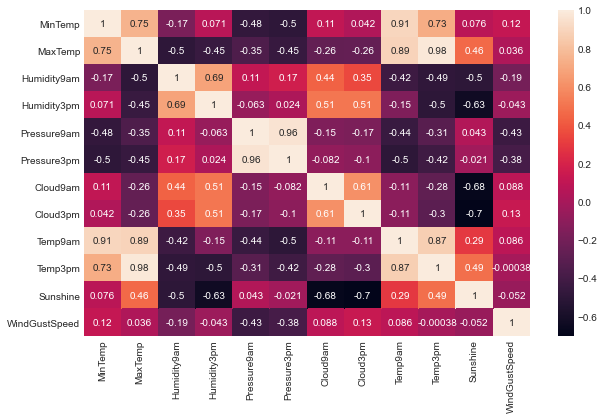

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(df_wind.corr(), annot=True)

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
df['WindGustDir'].value_counts()

E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516
NNW    2289
Name: WindGustDir, dtype: int64

In [54]:
le = LabelEncoder()
df_wind['WindGustDir'] = le.fit_transform(df_wind['WindGustDir'])

<ipython-input-54-3a0c99bf28e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind['WindGustDir'] = le.fit_transform(df_wind['WindGustDir'])


In [55]:
Xw = df_wind.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]]
yw = df_wind.iloc[:, 0]

In [56]:
wX_train, wX_test, wy_train, wy_test = train_test_split(Xw, yw, test_size=0.20, random_state=0)

In [57]:
from sklearn.pipeline import make_pipeline
modelWind = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma= 5, random_state=0))
modelWind.fit(wX_train, wy_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma=5, random_state=0))])

In [58]:
pred_wind = modelWind.predict(wX_test)

In [59]:
        print(classification_report(wy_test, pred_wind))

              precision    recall  f1-score   support

           0       0.11      0.67      0.19       942
           1       0.25      0.17      0.20       786
           2       0.16      0.02      0.04       654
           3       0.23      0.25      0.24       838
           4       0.31      0.05      0.09       641
           5       0.08      0.00      0.00       489
           6       0.38      0.01      0.01       452
           7       0.16      0.01      0.01       539
           8       0.18      0.05      0.08       740
           9       0.22      0.13      0.17       752
          10       0.21      0.03      0.05       665
          11       0.17      0.07      0.10       827
          12       0.16      0.17      0.17       762
          13       0.16      0.33      0.22       803
          14       0.30      0.03      0.06       612
          15       0.17      0.05      0.07       782

    accuracy                           0.15     11284
   macro avg       0.20   

In [61]:
modelWindlin = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0, gamma= 5, random_state=0))
modelWindlin.fit(wX_train, wy_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma=5, kernel='linear', random_state=0))])

In [62]:
pred_windlin = modelWindlin.predict(wX_test)

In [63]:
print(classification_report(wy_test, pred_windlin))

              precision    recall  f1-score   support

           0       0.17      0.39      0.23       942
           1       0.17      0.45      0.25       786
           2       0.00      0.00      0.00       654
           3       0.19      0.40      0.26       838
           4       0.00      0.00      0.00       641
           5       0.27      0.01      0.02       489
           6       0.50      0.00      0.00       452
           7       0.17      0.00      0.00       539
           8       0.17      0.16      0.16       740
           9       0.14      0.14      0.14       752
          10       0.14      0.03      0.05       665
          11       0.12      0.05      0.07       827
          12       0.15      0.28      0.19       762
          13       0.17      0.33      0.22       803
          14       0.10      0.01      0.02       612
          15       0.30      0.05      0.09       782

    accuracy                           0.17     11284
   macro avg       0.17   

In [65]:
modelWindrf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=500, random_state=0))
modelWindrf.fit(wX_train, wy_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=500, random_state=0))])

In [66]:
pred_windrf = modelWindrf.predict(wX_test)

In [67]:
print(classification_report(wy_test, pred_windrf))

              precision    recall  f1-score   support

           0       0.24      0.34      0.28       942
           1       0.22      0.27      0.24       786
           2       0.17      0.13      0.14       654
           3       0.28      0.40      0.33       838
           4       0.23      0.21      0.22       641
           5       0.19      0.09      0.13       489
           6       0.22      0.11      0.15       452
           7       0.19      0.12      0.15       539
           8       0.20      0.20      0.20       740
           9       0.21      0.24      0.23       752
          10       0.16      0.12      0.14       665
          11       0.17      0.15      0.16       827
          12       0.19      0.24      0.21       762
          13       0.22      0.30      0.25       803
          14       0.25      0.15      0.19       612
          15       0.23      0.18      0.20       782

    accuracy                           0.22     11284
   macro avg       0.21   

In [89]:
from sklearn.neighbors import KNeighborsClassifier
modelWindKNN = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=16, metric='minkowski', p=5))
modelWindKNN.fit(wX_train, wy_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=16, p=5))])

In [90]:
predwindknn = modelWindKNN.predict(wX_test)

In [91]:
print(classification_report(wy_test, predwindknn))

              precision    recall  f1-score   support

           0       0.18      0.33      0.23       942
           1       0.17      0.27      0.21       786
           2       0.11      0.11      0.11       654
           3       0.23      0.31      0.26       838
           4       0.14      0.13      0.14       641
           5       0.07      0.04      0.05       489
           6       0.11      0.06      0.08       452
           7       0.13      0.08      0.10       539
           8       0.15      0.16      0.15       740
           9       0.20      0.20      0.20       752
          10       0.12      0.08      0.10       665
          11       0.15      0.11      0.13       827
          12       0.15      0.16      0.16       762
          13       0.19      0.20      0.20       803
          14       0.19      0.11      0.14       612
          15       0.16      0.09      0.12       782

    accuracy                           0.17     11284
   macro avg       0.15   

# Prediksi Arah Mata Angin :

Dari hasil classification report tersebut, Random Forest memiliki hasil yang paling positif. Namun, kenapa ke-4 algoritma akurasi nya memiliki nilai/persentase yang sangat rendah ?

- Semakin banyak grup/classification yang di prediksi, semakin susah untuk algoritma tersebut memprediksi secara akurat.
- Feature yang kurang kuat/cocok untuk memprediksi arah mata angin.
- Random Forest merupakan classifier yg pling akurat di sini, karena Random Forest robust terhadap outlier dan dia bisa meng-handle dimensi data yang tinggi.